## Importing basic libraries required for the project

In [ ]:
import math
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

tf.random.set_seed(20)

## Mounting google drive to download a dataset from there

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_set = pd.read_csv('gdrive/My Drive/MNIST Sign Language Dataset/sign_mnist_train/sign_mnist_train.csv')
test_set = pd.read_csv('gdrive/My Drive/MNIST Sign Language Dataset/sign_mnist_test/sign_mnist_test.csv')

## Dataset depiction

In [ ]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
print('The shape of the training set:' + str(train_set.shape))
print('The shape of the test (hold_out) set:' + str(test_set.shape))

The shape of the training set:(27455, 785)
The shape of the test (hold_out) set:(7172, 785)


### Checking if the datasets have missing values in any of the columns

In [ ]:
print(sum(train_set.isna().sum()))
print(sum(test_set.isna().sum()))

0
0


### Separating input images from labels for both sets

In [ ]:
X_train = train_set.drop(labels = ['label'], axis=1)
y_train = train_set['label']
X_test = test_set.drop(labels = ['label'], axis = 1)
y_test = test_set['label']
print('X_train shape:' + str(X_train.shape) + '\ny_train shape:' + str(y_train.shape) + '\nX_test shape:' + str(X_test.shape) + '\ny_test shape:'
+ str(y_test.shape))

X_train shape:(27455, 784)
y_train shape:(27455,)
X_test shape:(7172, 784)
y_test shape:(7172,)


In [ ]:
unique_labels = y_train.unique()
unique_labels = np.sort(unique_labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
y_train[0]

3

### Reshaping the images

In [ ]:
d = int((X_train.shape[1])**0.5)
print(f'Shape of the images: {d} x {d}')
X_train = X_train.values.reshape(-1,d,d,1)
X_test = X_test.values.reshape(-1,d,d,1)
print(X_train.shape)
print(X_test.shape)
print('Number of unique classes:', y_train.nunique())

Shape of the images: 28 x 28
(27455, 28, 28, 1)
(7172, 28, 28, 1)
Number of unique classes: 24


### Plor the distribution of classes

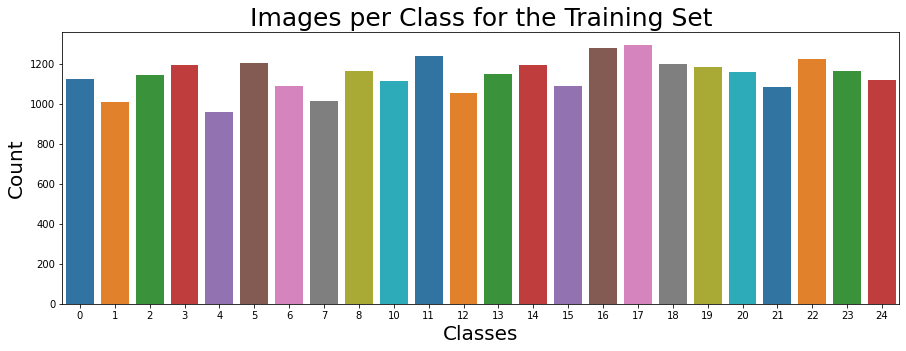

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,5))
sns.countplot(y_train, palette = sns.color_palette())
plt.xlabel("Classes", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Images per Class for the Training Set", fontsize=25)
plt.show()

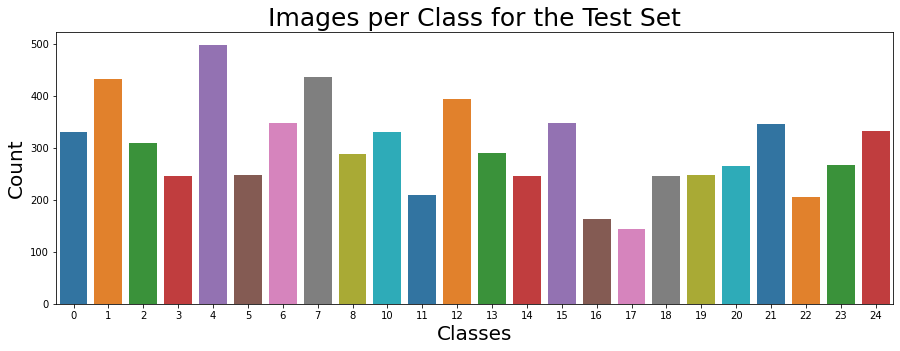

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,5))
sns.countplot(y_test, palette = sns.color_palette())
plt.xlabel("Classes", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Images per Class for the Test Set", fontsize=25)
plt.show()

## Viewing the images

### Training images

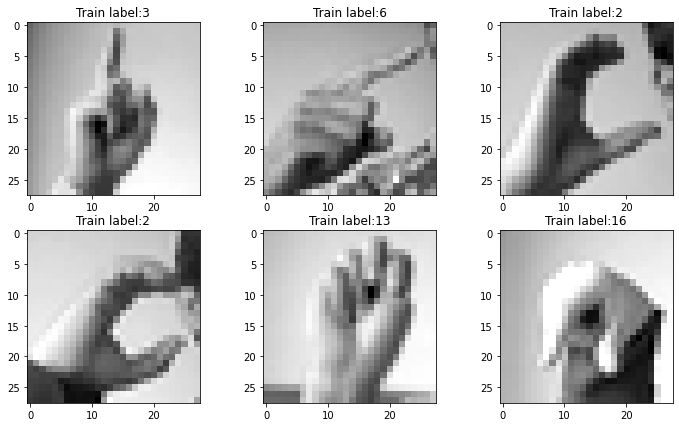

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title('Train label:'+ str(y_train[i]))
plt.show()

### Test images

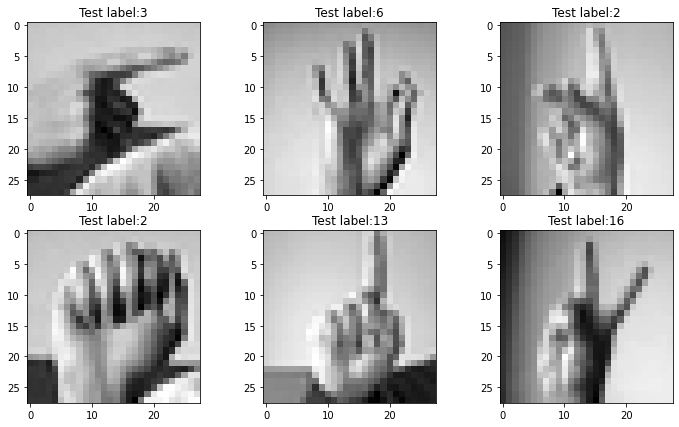

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title('Test label:'+ str(y_train[i]))
plt.show()

## Label Binarizer (One-hot encoding)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
y_train[5]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

## Scaling the images

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Data augmentation

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1,  X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42, shuffle = True, stratify = y_train)

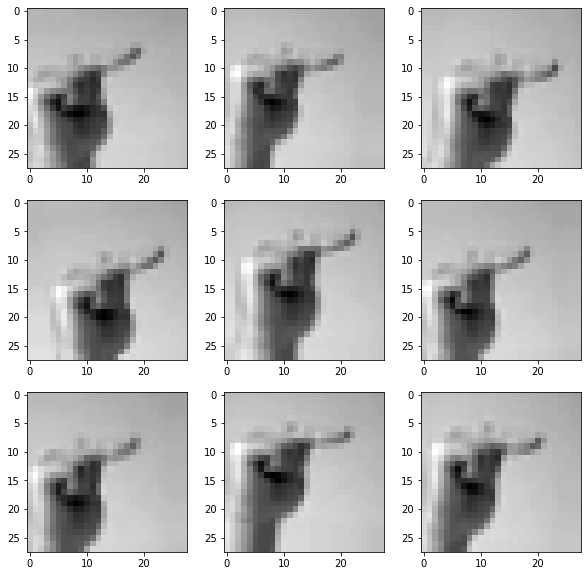

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from numpy import expand_dims
from tensorflow.keras.utils import img_to_array

datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images 
        zoom_range = 0.1, # randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally 
        height_shift_range=0.1,  # randomly shift images vertically 
        ) 

data = img_to_array(X_train_1[2]*255)
samples = expand_dims(data, 0)
it = datagen.flow(samples, batch_size=1)

# plotting the augmented images
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next() 
	image = batch[0].astype('uint8')
	plt.imshow(image.squeeze(), cmap='gray')
plt.show()

datagen.fit(X_train_1)

## Building a CNN model

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=75, max_value=200, step=25),
        kernel_size=(3,3),
        activation='relu',
        
        input_shape=(28,28,1)
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=50, max_value=125, step=25),
        kernel_size=(3,3),
        activation='relu',
    ),
    
    keras.layers.Dropout(
        rate = hp.Choice('drop_1_rate', values = [0.1,0.5])
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    
    
    keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=25, max_value=75, step=25),
        kernel_size=(3,3),
        activation='relu',
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),  
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=128, max_value=1024, step=32),
        activation='relu'
    ),
    keras.layers.Dropout(
        rate = hp.Choice('drop_2_rate', values = [0.1,0.3])
    ),
    keras.layers.Dense(24, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

### Installing keras-tuner

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.5 MB/s 
     |████████████████████████████████| 1.6 MB 32.0 MB/s 


## Applying Random Search optimization

In [ ]:
from kerastuner import RandomSearch
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="SignLanguageDetection")

In [ ]:
import random
import numpy as np
np.random.seed(123)
random.seed(123)
tf.random.set_seed(20)

tuner_search.search(X_train_1,y_train_1,epochs=5,validation_data = (X_val, y_val))

Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.9803321957588196

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 51s


In [ ]:
tuner_search.search_space_summary()

Search space summary
Default search space size: 7
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 75, 'max_value': 200, 'step': 25, 'sampling': None}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 125, 'step': 25, 'sampling': None}
drop_1_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.5], 'ordered': True}
conv_3_filter (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 75, 'step': 25, 'sampling': None}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}
drop_2_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001], 'ordered': True}


In [ ]:
model = tuner_search.get_best_models(num_models = 1)[0]
model

In [ ]:
tuner_search.results_summary()

Results summary
Results in output/SignLanguageDetection
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 100
conv_2_filter: 75
drop_1_rate: 0.1
conv_3_filter: 50
dense_1_units: 768
drop_2_rate: 0.3
learning_rate: 0.001
Score: 1.0
Trial summary
Hyperparameters:
conv_1_filter: 125
conv_2_filter: 100
drop_1_rate: 0.5
conv_3_filter: 50
dense_1_units: 320
drop_2_rate: 0.3
learning_rate: 0.01
Score: 0.9855769276618958
Trial summary
Hyperparameters:
conv_1_filter: 100
conv_2_filter: 50
drop_1_rate: 0.5
conv_3_filter: 50
dense_1_units: 864
drop_2_rate: 0.3
learning_rate: 0.01
Score: 0.9803321957588196
Trial summary
Hyperparameters:
conv_1_filter: 175
conv_2_filter: 75
drop_1_rate: 0.1
conv_3_filter: 25
dense_1_units: 480
drop_2_rate: 0.3
learning_rate: 0.01
Score: 0.9733391404151917
Trial summary
Hyperparameters:
conv_1_filter: 150
conv_2_filter: 100
drop_1_rate: 0.5
conv_3_filter: 25
dense_1_units: 608
drop_2_rate: 0.3
learning_rate: 0.001
Score: 0.9526515007019043


## Introducing the callback, which reduces the learning rate after 3 epochs if it is not changing

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.5, min_lr=0.00001)

## Training the model with the best parameters

In [ ]:
import random
import numpy as np
np.random.seed(123)
random.seed(123)
tf.random.set_seed(20)

history = model.fit(datagen.flow(X_train,y_train, batch_size = 128) 
                    ,epochs = 20
                    , validation_data = (X_test, y_test)
                    , callbacks = [lr_reduction])

Epoch 1/20
215/215 [==============================] - 11s 49ms/step - loss: 0.1994 - accuracy: 0.9412 - val_loss: 0.1208 - val_accuracy: 0.9573 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0538 - accuracy: 0.9826 - val_loss: 0.1506 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0722 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 11s 50ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.0118 - val_accuracy: 0.9954 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 11s 50ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.0090 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 10s 47ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0837 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - 11s 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 100)       1000      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 100)      400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 75)        67575     
                                                                 
 dropout (Dropout)           (None, 11, 11, 75)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 75)       3

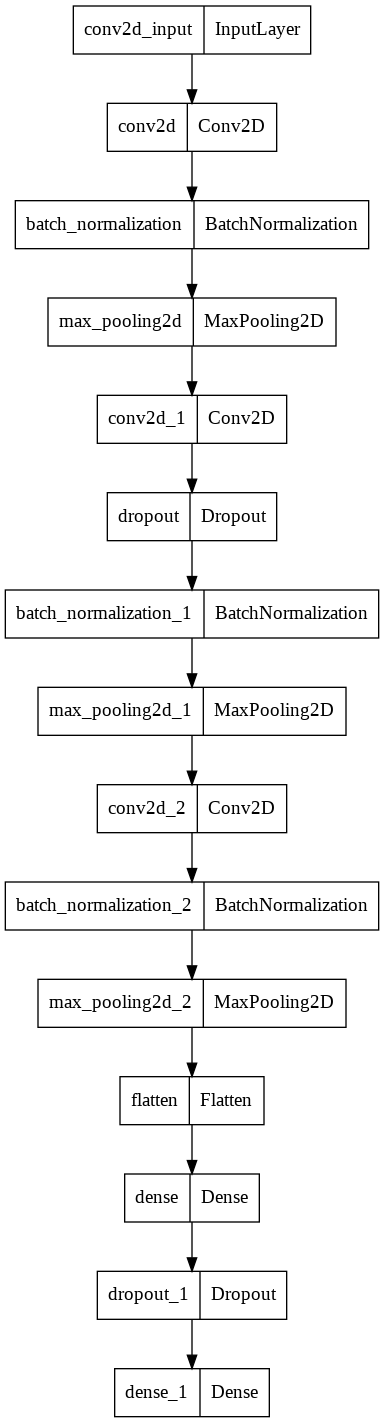

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
y_predicted = model.predict(X_test)

225/225 [==============================] - 1s 2ms/step


## Train and Test accuracy/loss graphs


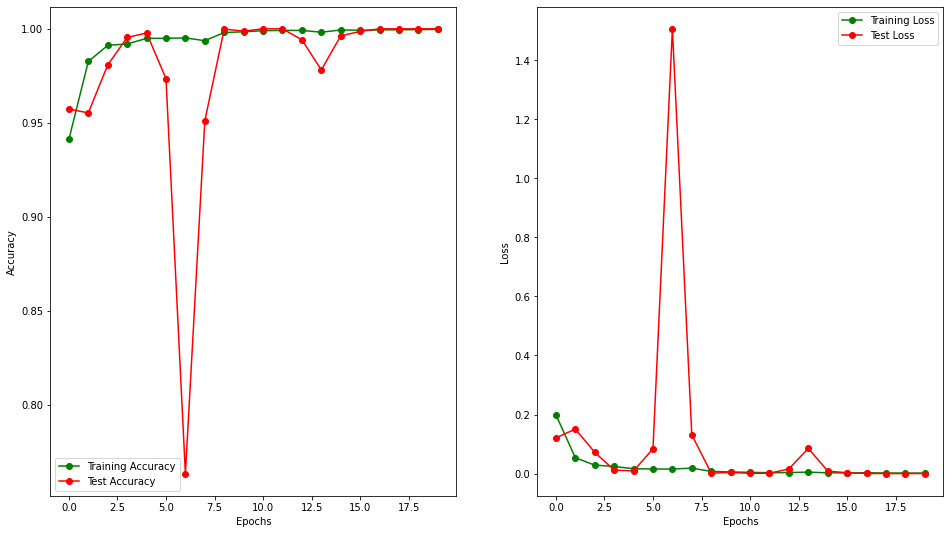

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Test Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Test Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
import numpy as np
def predictions_to_labels(pred):
    labels =[]
    for p in pred:
        labels.append(unique_labels[np.argmax(p)])
    return labels

In [ ]:
y_pred_labels = predictions_to_labels(y_predicted)
y_test_labels = predictions_to_labels(y_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test_labels,y_pred_labels)

1.0

## Confusion Matrix




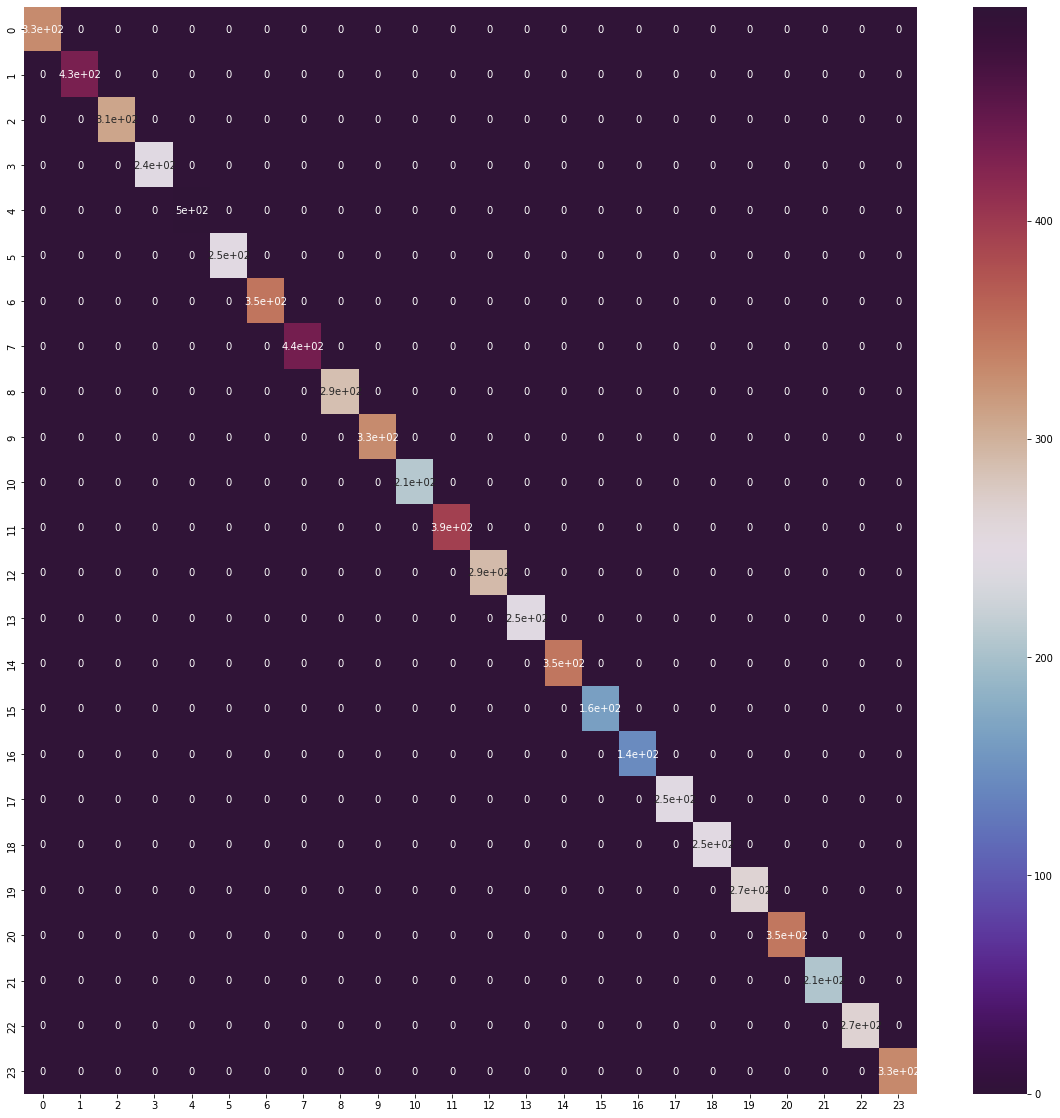

In [ ]:
cm= confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,cmap='twilight_shifted')

## Classification report

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report
print(classification_report(y_test_labels, y_pred_labels))
print("Macro Average Recall = {:.3f}".format(recall_score(y_test_labels, y_pred_labels, average='macro')))
print("Macro Average Precision = {:.3f}".format(precision_score(y_test_labels, y_pred_labels, average='macro')))
print("Macro Average F1 score = {:.3f}".format(f1_score(y_test_labels, y_pred_labels, average='macro')))
print("Macro Average ROC AUC = {:.3f}".format(roc_auc_score(y_test, y_predicted, multi_class='ovr', average='macro')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       1.00      1.00      1.00       144
          18       1.00    

## Machine Learning (ML) Methods

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as LRR
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
X_train = train_set.drop(labels = ['label'], axis=1)
y_train = train_set['label']
X_test = test_set.drop(labels = ['label'], axis = 1)
y_test = test_set['label']
X_train = X_train/255.0
X_test = X_test/255.0
X_train_1,  X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42, shuffle = True, stratify = y_train)

### k-Nearest Neighbors (kNN) Classifier

In [ ]:
import random
import numpy as np
np.random.seed(123)
random.seed(123)

no_of_neighbors = [3,5,7,9,11]
for i in no_of_neighbors:
  kNN= KNN(n_neighbors=i).fit(X_train_1,y_train_1)
  y_predictions_val = kNN.predict(X_val)
  print('The accuracy for NN={} on the training data is {:.3f}'.format(i, kNN.score(X_train_1, y_train_1)))
  print('The accuracy for NN={} on the validation data is {:.3f}'.format(i, accuracy_score(y_val, y_predictions_val)))

The accuracy for NN=3 on the training data is 1.000
The accuracy for NN=3 on the validation data is 0.998
The accuracy for NN=5 on the training data is 0.998
The accuracy for NN=5 on the validation data is 0.997
The accuracy for NN=7 on the training data is 0.997
The accuracy for NN=7 on the validation data is 0.993
The accuracy for NN=9 on the training data is 0.994
The accuracy for NN=9 on the validation data is 0.990
The accuracy for NN=11 on the training data is 0.992
The accuracy for NN=11 on the validation data is 0.987


In [ ]:
import random
import numpy as np
np.random.seed(123)
random.seed(123)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report
kNN_best = KNN(n_neighbors = 3).fit(X_train, y_train)
y_test_predictions_kNN = kNN_best.predict(X_test)

print("Training accuracy = {:.3f}".format(kNN_best.score(X_train,y_train)))
print("Test accuracy = {:.3f}".format(accuracy_score(y_test, y_test_predictions_kNN)))

print("Macro Average Recall = {:.3f}".format(recall_score(y_test, y_test_predictions_kNN, average='macro')))
print("Macro Average Precision = {:.3f}".format(precision_score(y_test, y_test_predictions_kNN, average='macro')))
print("Macro Average F1 score = {:.3f}".format(f1_score(y_test, y_test_predictions_kNN, average='macro')))
print("Macro Average ROC AUC = {:.3f}".format(roc_auc_score(y_test, kNN_best.predict_proba(X_test), multi_class='ovr', average='macro')))

# Here we set average=None to print these metrics for each class individually (when the class is considered positive)
np.set_printoptions(precision=24)
print(classification_report(y_test, y_test_predictions_kNN)) # classification_report is used to print them out nicely

Training accuracy = 1.000
Test accuracy = 0.804
Macro Average Recall = 0.798
Macro Average Precision = 0.810
Macro Average F1 score = 0.793
Macro Average ROC AUC = 0.923
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       331
           1       0.95      0.94      0.94       432
           2       0.95      1.00      0.97       310
           3       0.76      0.95      0.85       245
           4       0.78      0.97      0.86       498
           5       0.87      0.91      0.89       247
           6       0.91      0.94      0.92       348
           7       0.95      0.94      0.94       436
           8       0.87      0.65      0.75       288
          10       0.85      0.59      0.70       331
          11       0.93      0.89      0.91       209
          12       0.81      0.49      0.61       394
          13       0.78      0.59      0.67       291
          14       1.00      0.88      0.94       246
          15       

### Logistic Regression (LR) Classifier

In [ ]:
import random
import numpy as np
np.random.seed(123)
random.seed(123)

C = [0.01, 0.1, 1, 10]
for i in C:
  lrr = LRR(C=i, penalty = 'l2', solver = 'liblinear').fit(X_train_1, y_train_1)
  y_predictions_val = lrr.predict(X_val)
  print('The accuracy for C={} on the training data is {:.3f}'.format(i, lrr.score(X_train_1, y_train_1)))
  print('The accuracy for C={} on the validation data is {:.3f}'.format(i, accuracy_score(y_val, y_predictions_val)))

The accuracy for C=0.01 on the training data is 0.816
The accuracy for C=0.01 on the validation data is 0.807
The accuracy for C=0.1 on the training data is 0.961
The accuracy for C=0.1 on the validation data is 0.952
The accuracy for C=1 on the training data is 0.999
The accuracy for C=1 on the validation data is 0.998
The accuracy for C=10 on the training data is 1.000
The accuracy for C=10 on the validation data is 0.999


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report
import random
import numpy as np
np.random.seed(123)
random.seed(123)

lrr_best = LRR(C= 10, penalty = 'l2', solver = 'liblinear').fit(X_train, y_train)
y_test_predictions_lrr = lrr_best.predict(X_test)

print("Training accuracy = {:.3f}".format(lrr_best.score(X_train,y_train)))
print("Test accuracy = {:.3f}".format(accuracy_score(y_test, y_test_predictions_lrr)))

print("Macro Average Recall = {:.3f}".format(recall_score(y_test, y_test_predictions_lrr, average='macro')))
print("Macro Average Precision = {:.3f}".format(precision_score(y_test, y_test_predictions_lrr, average='macro')))
print("Macro Average F1 score = {:.3f}".format(f1_score(y_test, y_test_predictions_lrr, average='macro')))
print("Macro Average ROC AUC = {:.3f}".format(roc_auc_score(y_test, lrr_best.predict_proba(X_test), multi_class='ovr', average='macro')))

# Here we set average=None to print these metrics for each class individually (when the class is considered positive)
np.set_printoptions(precision=24)
print(classification_report(y_test, y_test_predictions_lrr)) # classification_report is used to print them out nicely

Training accuracy = 1.000
Test accuracy = 0.660
Macro Average Recall = 0.648
Macro Average Precision = 0.664
Macro Average F1 score = 0.641
Macro Average ROC AUC = 0.935
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       331
           1       1.00      0.82      0.90       432
           2       0.93      0.86      0.89       310
           3       0.78      0.92      0.84       245
           4       0.80      0.88      0.84       498
           5       0.61      0.89      0.72       247
           6       0.70      0.80      0.75       348
           7       0.83      0.71      0.77       436
           8       0.70      0.57      0.62       288
          10       0.65      0.35      0.46       331
          11       0.76      0.90      0.82       209
          12       0.67      0.49      0.57       394
          13       0.54      0.45      0.49       291
          14       1.00      0.58      0.73       246
          15       

## Random Forest classifier

In [ ]:
import random
import numpy as np
np.random.seed(123)
random.seed(123)

no_of_estimators = [50,100,150,200]
for i in no_of_estimators:
  RF= RandomForestClassifier(n_estimators = i, random_state = 42).fit(X_train_1,y_train_1)
  y_predictions_val = RF.predict(X_val)
  print('The accuracy for no. of trees={} on the training data is {:.3f}'.format(i, RF.score(X_train_1, y_train_1)))
  print('The accuracy for no. of trees={} on the validation data is {:.3f}'.format(i, accuracy_score(y_val, y_predictions_val)))

The accuracy for no. of trees=50 on the training data is 1.000
The accuracy for no. of trees=50 on the validation data is 0.995
The accuracy for no. of trees=100 on the training data is 1.000
The accuracy for no. of trees=100 on the validation data is 0.997
The accuracy for no. of trees=150 on the training data is 1.000
The accuracy for no. of trees=150 on the validation data is 0.998
The accuracy for no. of trees=200 on the training data is 1.000
The accuracy for no. of trees=200 on the validation data is 0.998


In [ ]:
import random
import numpy as np
np.random.seed(123)
random.seed(123)

rf_best = RandomForestClassifier(n_estimators=150).fit(X_train, y_train)
y_test_predictions_rf = rf_best.predict(X_test)

print("Training accuracy = {:.3f}".format(rf_best.score(X_train,y_train)))
print("Test accuracy = {:.3f}".format(accuracy_score(y_test, y_test_predictions_rf)))

print("Macro Average Recall = {:.3f}".format(recall_score(y_test, y_test_predictions_rf, average='macro')))
print("Macro Average Precision = {:.3f}".format(precision_score(y_test, y_test_predictions_rf, average='macro')))
print("Macro Average F1 score = {:.3f}".format(f1_score(y_test, y_test_predictions_rf, average='macro')))
print("Macro Average ROC AUC = {:.3f}".format(roc_auc_score(y_test, rf_best.predict_proba(X_test), multi_class='ovr', average='macro')))

# Here we set average=None to print these metrics for each class individually (when the class is considered positive)
np.set_printoptions(precision=24)
print(classification_report(y_test, y_test_predictions_rf)) # classification_report is used to print them out nicely

Training accuracy = 1.000
Test accuracy = 0.820
Macro Average Recall = 0.814
Macro Average Precision = 0.817
Macro Average F1 score = 0.806
Macro Average ROC AUC = 0.984
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       0.98      0.94      0.96       432
           2       0.97      0.99      0.98       310
           3       0.94      0.98      0.96       245
           4       0.88      0.97      0.92       498
           5       0.90      0.92      0.91       247
           6       0.92      0.84      0.88       348
           7       0.96      0.94      0.95       436
           8       0.82      0.77      0.79       288
          10       0.77      0.69      0.73       331
          11       0.79      1.00      0.89       209
          12       0.85      0.65      0.74       394
          13       0.80      0.53      0.64       291
          14       0.98      0.88      0.93       246
          15       